In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
from datetime import datetime
from datetime import timedelta
import yfinance as yf
from dateutil.relativedelta import relativedelta

In [3]:
assets = ['RELIANCE.BO', 'TCS.BO', 'INFY.BO', 'HDFCBANK.BO', 'ICICIBANK.BO', 
           'SBIN.BO', 'BHARTIARTL.BO', 'LT.BO']

In [4]:
end_date = datetime.today()
print(end_date)

2025-01-22 23:48:59.748129


In [5]:
start_date = end_date - relativedelta(years=10)
print(start_date)

2015-01-22 23:48:59.748129


In [6]:
close_prices = pd.DataFrame()

In [7]:
for asset in assets:
    data = yf.download(asset, start=start_date, end=end_date)
    close_prices[asset] = data['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
close_prices.head()

,RELIANCE.BO,TCS.BO,INFY.BO,HDFCBANK.BO,ICICIBANK.BO,SBIN.BO,BHARTIARTL.BO,LT.BO
Date,,,,,,,,
2015-01-22,185.380112,953.682373,376.582367,455.001221,309.150513,292.273193,351.370422,959.098755
2015-01-23,185.977707,949.488220,379.729675,464.692535,310.155212,294.931030,364.429901,983.868042
2015-01-27,186.355133,953.717834,366.343323,478.550049,321.248596,297.138428,373.642700,1004.254028
2015-01-28,189.940704,965.873718,367.904083,471.465363,321.374146,301.327942,354.979523,979.023682
2015-01-29,194.564194,968.407959,367.526794,487.595215,318.108978,294.390533,356.309235,991.509155


In [10]:
import matplotlib.pyplot as plt

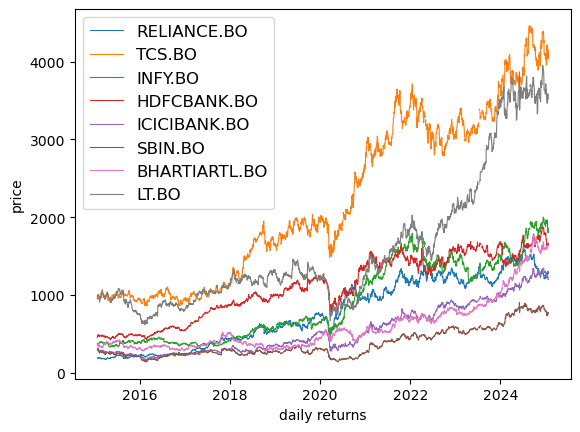

In [11]:
for c in close_prices.columns.values:
    plt.plot(close_prices.index,close_prices[c], lw=0.8, alpha =1, label =c)
    plt.legend(loc='upper left',fontsize=12)
    plt.ylabel('price')
    plt.xlabel('daily returns')

In [12]:
print(type(close_prices))

<class 'pandas.core.frame.DataFrame'>


In [13]:
print(type(close_prices))

<class 'pandas.core.frame.DataFrame'>


In [14]:
returns =((close_prices/close_prices.shift(1))-1)
returns.head()

,RELIANCE.BO,TCS.BO,INFY.BO,HDFCBANK.BO,ICICIBANK.BO,SBIN.BO,BHARTIARTL.BO,LT.BO
Date,,,,,,,,
2015-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-23,0.003224,-0.004398,0.008358,0.021300,0.003250,0.009094,0.037167,0.025826
2015-01-27,0.002029,0.004455,-0.035252,0.029821,0.035767,0.007484,0.025280,0.020720
2015-01-28,0.019241,0.012746,0.004260,-0.014804,0.000391,0.014100,-0.049949,-0.025123
2015-01-29,0.024342,0.002624,-0.001026,0.034212,-0.010160,-0.023023,0.003746,0.012753


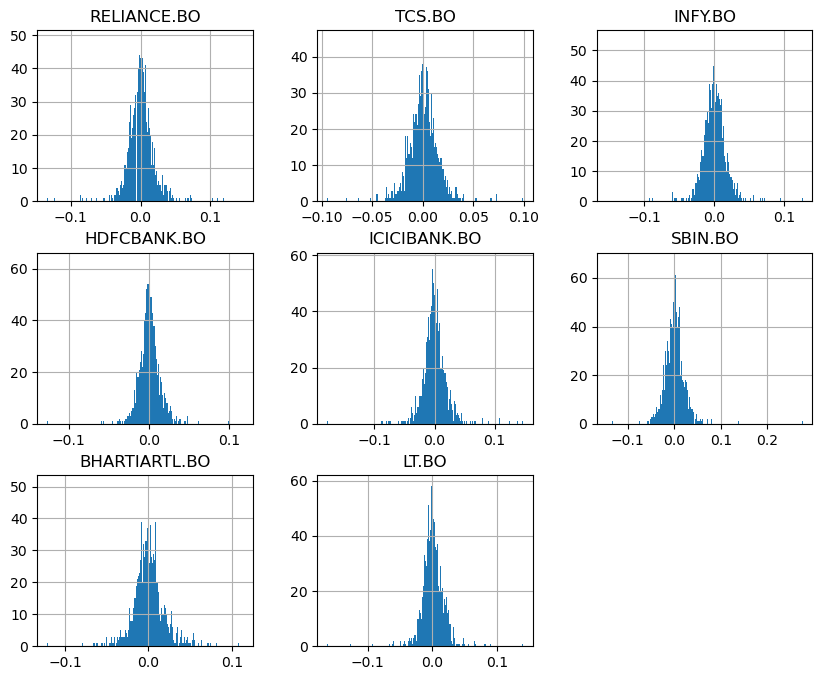

In [15]:
returns.hist(bins=500,figsize= (10,8))
plt.show()

In [16]:
log_returns = np.log(close_prices/close_prices.shift(1))
log_returns 

,RELIANCE.BO,TCS.BO,INFY.BO,HDFCBANK.BO,ICICIBANK.BO,SBIN.BO,BHARTIARTL.BO,LT.BO
Date,,,,,,,,
2015-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-23,0.003218,-0.004408,0.008323,0.021076,0.003245,0.009053,0.036493,0.025498
2015-01-27,0.002027,0.004445,-0.035889,0.029385,0.035142,0.007457,0.024966,0.020509
2015-01-28,0.019058,0.012665,0.004251,-0.014915,0.000391,0.014001,-0.051240,-0.025444
2015-01-29,0.024050,0.002620,-0.001026,0.033640,-0.010212,-0.023292,0.003739,0.012672
...,...,...,...,...,...,...,...,...
2025-01-16,0.013011,-0.009566,-0.012178,0.006069,0.009123,0.016312,0.014509,0.003208
2025-01-17,0.025371,-0.001550,-0.059409,-0.009759,-0.019308,-0.003006,-0.002485,0.015846
2025-01-20,0.002839,-0.011887,-0.001020,0.008851,0.005653,0.019377,0.008414,0.005004


In [17]:
log_returns.mean()*252

RELIANCE.BO      0.197316
TCS.BO           0.137446
INFY.BO          0.147395
HDFCBANK.BO      0.143463
ICICIBANK.BO     0.142666
SBIN.BO          0.108725
BHARTIARTL.BO    0.159012
LT.BO            0.139809
dtype: float64

In [18]:
log_returns.cov()*252

,RELIANCE.BO,TCS.BO,INFY.BO,HDFCBANK.BO,ICICIBANK.BO,SBIN.BO,BHARTIARTL.BO,LT.BO
RELIANCE.BO,0.077385,0.017623,0.018879,0.024784,0.032198,0.034061,0.023128,0.027996
TCS.BO,0.017623,0.055053,0.035615,0.013497,0.015793,0.014483,0.012483,0.015561
INFY.BO,0.018879,0.035615,0.070417,0.016480,0.020418,0.017858,0.015508,0.018078
HDFCBANK.BO,0.024784,0.013497,0.016480,0.051475,0.036949,0.032482,0.019689,0.029281
ICICIBANK.BO,0.032198,0.015793,0.020418,0.036949,0.099267,0.070191,0.027697,0.043356
SBIN.BO,0.034061,0.014483,0.017858,0.032482,0.070191,0.112201,0.029041,0.046248
BHARTIARTL.BO,0.023128,0.012483,0.015508,0.019689,0.027697,0.029041,0.091492,0.024464
LT.BO,0.027996,0.015561,0.018078,0.029281,0.043356,0.046248,0.024464,0.072663


In [19]:
log_returns.corr()

,RELIANCE.BO,TCS.BO,INFY.BO,HDFCBANK.BO,ICICIBANK.BO,SBIN.BO,BHARTIARTL.BO,LT.BO
RELIANCE.BO,1.000000,0.269815,0.255581,0.392430,0.367139,0.365311,0.274697,0.373115
TCS.BO,0.269815,1.000000,0.572005,0.253541,0.213899,0.184503,0.176109,0.246340
INFY.BO,0.255581,0.572005,1.000000,0.273734,0.244118,0.200820,0.193125,0.252631
HDFCBANK.BO,0.392430,0.253541,0.273734,1.000000,0.516646,0.427207,0.286766,0.478542
ICICIBANK.BO,0.367139,0.213899,0.244118,0.516646,1.000000,0.665095,0.290634,0.510490
SBIN.BO,0.365311,0.184503,0.200820,0.427207,0.665095,1.000000,0.286634,0.512204
BHARTIARTL.BO,0.274697,0.176109,0.193125,0.286766,0.290634,0.286634,1.000000,0.300037
LT.BO,0.373115,0.246340,0.252631,0.478542,0.510490,0.512204,0.300037,1.000000


In [21]:
num_assets = len(close_prices.columns)
num_assets

8

In [23]:
weights = np.random.random(num_assets)

In [24]:
weights/=np.sum(weights)
weights

array([0.17205615, 0.05664734, 0.09385804, 0.18709584, 0.16317981,
       0.07217838, 0.13751004, 0.1174744 ])

In [25]:
weights[0]+weights[1]+weights[2]+weights[3]+weights[4]+weights[5]+weights[6]+weights[7]

1.0

In [26]:
exp_por_ret = np.sum(weights * log_returns.mean())*252
exp_por_ret 

0.1518284068624112

In [27]:
exp_por_var =np.dot(weights.T,np.dot(log_returns.cov()*252,weights))
exp_por_var 

0.03414480410782915

In [28]:
exp_risk = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
exp_risk

0.18478312722710682

In [46]:
por_ret = []
por_risk = []
sharpe_ratio = []
Rf = 0.075
for x in range(25000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    por_ret.append(np.sum(weights * log_returns.mean()) * 252)
    por_risk.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights))))
    sharpe_ratio.append((por_ret[-1] - Rf)/por_risk[-1])

In [47]:
portofolios = pd.DataFrame({'Return':por_ret,'Risk':por_risk,'S_ratio':sharpe_ratio})

In [48]:
portofolios

,Return,Risk,S_ratio
0,0.146502,0.179970,0.397299
1,0.138868,0.200645,0.318314
2,0.145998,0.185833,0.382052
3,0.148487,0.190082,0.386609
4,0.138360,0.199965,0.316855
...,...,...,...
24995,0.149760,0.178021,0.419950
24996,0.141916,0.180795,0.370120
24997,0.150698,0.200936,0.376726
24998,0.158611,0.184002,0.454400


In [49]:
portofolios['S_ratio'].max()

0.4896684600060647

In [50]:
portofolios['S_ratio'].min()

0.22500305680092275

In [51]:
portofolios['Return'].max()

0.17269092465316185

In [52]:
portofolios['Return'].min()

0.12747354664517163

In [53]:
portofolios['Risk'].max()

0.2438580011841319

In [54]:
portofolios['Risk'].min()

0.16744921019608688

Text(0, 0.5, 'Expected Return')

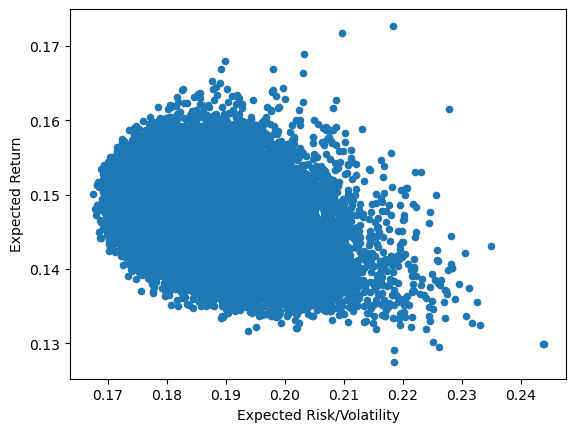

In [55]:
portofolios.plot(x='Risk', y ='Return', kind = 'scatter');
plt.xlabel('Expected Risk/Volatility')
plt.ylabel('Expected Return')

In [9]:
asset = close_prices.to_csv('close_prices.csv')

In [58]:
portofolios.to_csv('portofolios.csv',index = False)